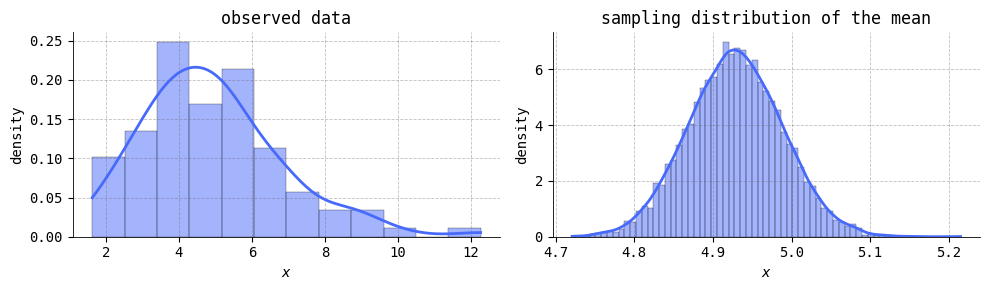

In [189]:
import numpy as np
import scipy as sp
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as ss
#import matplotlib_inline.backend_inline
#import matplotlib.colors as clr
plt.style.use('./aux-files/custom_style_light.mplstyle')
#matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
blue = '#486AFB'
magenta = '#FD46FC'

np.random.seed(42)
X = ss.gamma(a=5)

sample_size = 100
resample_size = 1000
random_sample = X.rvs(size=sample_size)
replicate_means = []
num_resamples = 10000

for _ in range(num_resamples):
    sample = np.random.choice(a=random_sample, size=resample_size, replace=True)
    replicate_means.append(sample.mean())

_, axes = plt.subplots(ncols=2, figsize=(10, 3))

sns.histplot(x=random_sample, ec='black', stat='density', kde=True, ax=axes[0])
sns.histplot(x=replicate_means, ec='black', stat='density', kde=True, ax=axes[1])
axes[0].set_xlabel('$x$')
axes[0].set_ylabel('density')
axes[0].set_title('observed data')
axes[1].set_xlabel('$x$')
axes[1].set_ylabel('density')
axes[1].set_title('sampling distribution of the mean')
plt.tight_layout()

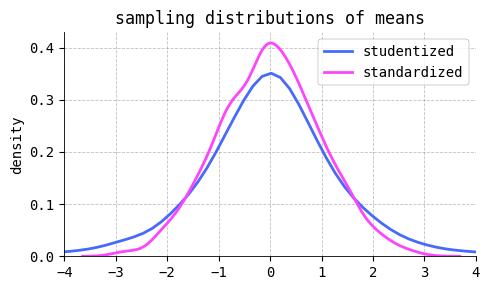

In [187]:
np.random.seed(42)

num_samples = 2048
mu = 2
std = 3
empirical_means = np.empty(shape=(num_samples,))
empirical_stds = np.empty(shape=(num_samples,))
m = 4

for i in range(num_samples):
    sample = ss.norm(loc=mu, scale=std).rvs(size=m)
    empirical_means[i] = sample.mean()
    empirical_stds[i] = sample.std(ddof=1)

studentized_means = np.sqrt(m) * (empirical_means - mu) / empirical_stds
standardized_means = np.sqrt(m) * (empirical_means - mu) / std

sns.kdeplot(x=studentized_means, label='studentized')
sns.kdeplot(x=standardized_means, label='standardized')
plt.ylabel('density')
plt.legend()
plt.xlim(-4, 4)
plt.gcf().set_size_inches(w=5, h=3)
plt.title('sampling distributions of means')
plt.tight_layout()

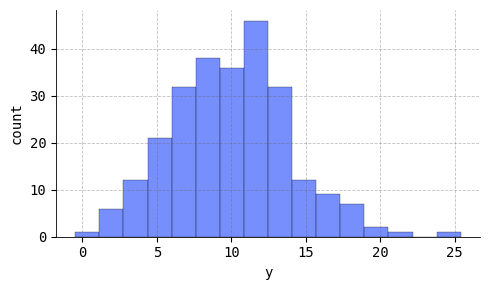

In [138]:
np.random.seed(42)

y = np.random.normal(loc=10, scale=4, size=256)

sns.histplot(x=y, ec='black')
plt.gcf().set_size_inches(w=5, h=3)
plt.xlabel('y')
plt.ylabel('count')
plt.tight_layout()

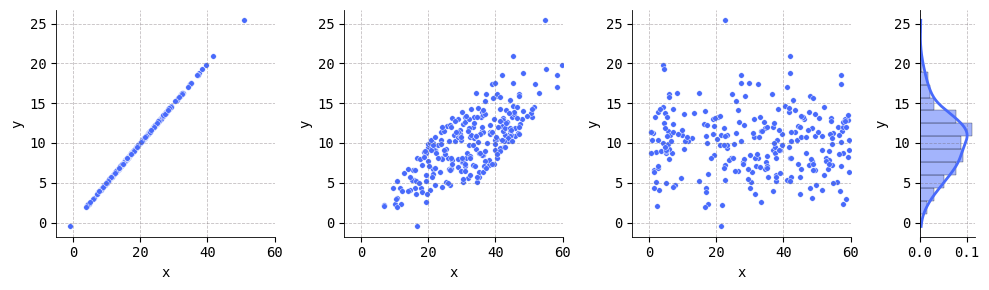

In [128]:
np.random.seed(42)
fig = plt.figure(figsize=(10, 3))
gs = fig.add_gridspec(ncols=4, width_ratios=[1, 1, 1, 0.25])
ax0 = fig.add_subplot(gs[0])
ax1 = fig.add_subplot(gs[1])
ax2 = fig.add_subplot(gs[2])
ax3 = fig.add_subplot(gs[3])

x1 = 2 * y
sns.scatterplot(x=x1, y=y, ax=ax0)
ax0.set_xlabel('x')
ax0.set_ylabel('y')
ax0.set_xlim(-5, 60)

x2 = x1 + np.random.random(size=256) * 25
sns.scatterplot(x=x2, y=y, ax=ax1)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_xlim(-5, 60)

x3 = np.random.random(size=256) * 60
sns.scatterplot(x=x3, y=y, ax=ax2)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_xlim(-5, 60)

sns.histplot(y=y, stat='density', ax=ax3, kde=True, ec='black')
ax3.set_xlabel('')
ax3.set_ylabel('y')

plt.tight_layout()

In [134]:
import statsmodels.api as sm

model1 = sm.OLS(y, sm.add_constant(x1))
result1 = model1.fit()
print(result1.summary(slim=True))

model2 = sm.OLS(y, sm.add_constant(x2))
result2 = model2.fit()
print(result2.summary(slim=True))

model3 = sm.OLS(y, sm.add_constant(x3))
result3 = model3.fit()
print(result3.summary(slim=True))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
No. Observations:                 256   F-statistic:                 4.734e+33
Covariance Type:            nonrobust   Prob (F-statistic):               0.00
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.441e-16   1.56e-16      2.846      0.005    1.37e-16    7.51e-16
x1             0.5000   7.27e-18   6.88e+16      0.000       0.500       0.500

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.548
Model:                         

In [71]:
from statsmodels.stats.anova import anova_lm

# SSE is contained on the 'residual' line, while SSR is contained on the `x` line
# Summing these gives SST
table = anova_lm(result)
table

,df,sum_sq,mean_sq,F,PR(>F)
x,1.0,210.312416,210.312416,269.55761,6.920271e-30
Residual,98.0,76.460897,0.780213,NaN,NaN
